In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import re

In [2]:
df = pd.read_csv("/home/jovyan/istx100y2024/Projekt/lego.population.csv", sep = ",", encoding = "latin1")

df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [3]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Item_Number','Set_Name', 'Pieces', 'Price', 'Ages']]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# fjerner bokstaver og andre tegn fra alder
df2['Ages'] = df2['Ages'].str.replace('Ages_', '')
df2['Ages'] = df2['Ages'].str.replace('+', '')
df2['Ages'] = df2['Ages'].str.replace('½', '.5')



# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

# det er dataset dere skal bruke!
df2

,Item_Number,Set_Name,Pieces,Price,Ages
0,41916,Extra Dots - Series 2,109.0,3.99,6
1,41908,Extra Dots - Series 1,109.0,3.99,6
2,11006,Creative Blue Bricks,52.0,4.99,4
3,11007,Creative Green Bricks,60.0,4.99,4
4,41901,Funky Animals Bracelet,33.0,4.99,6
...,...,...,...,...,...
1299,45678,SPIKE Prime Set,528.0,329.95,10
1300,71367,Mario's House & Yoshi,205.0,29.99,6
1301,71368,Toad's Treasure Hunt,464.0,69.99,8
1302,71369,Bowser's Castle Boss Battle,1010.0,99.99,8


In [4]:
print(df2.mean(numeric_only = True))

Item_Number    50796.850704
Pieces           431.817840
Price             46.348967
dtype: float64


In [5]:
print(df2['Ages'].value_counts())

Ages
6        168
7        147
8        114
10        74
5         66
6-12      62
4         54
9         44
5-12      36
8-14      32
7-12      29
16        28
2         28
7-14      27
18        18
2-5       18
4-7       17
12        15
1.5       15
9-14      15
6-14      10
8-12      10
1.5-3      7
5-99       6
11         5
4-99       4
14         3
10-16      3
9-16       3
9-12       1
11-16      1
1.5-5      1
6-10       1
5-10       1
3-6        1
2-6        1
Name: count, dtype: int64


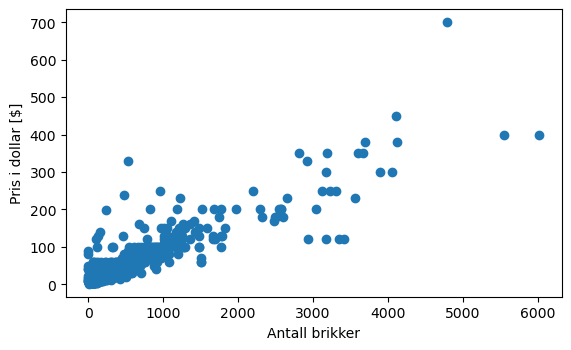

In [6]:
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect(5)
plt.show()

In [7]:
formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     4136.
Date:                Sat, 16 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:55:13   Log-Likelihood:                -5006.4
No. Observations:                1065   AIC:                         1.002e+04
Df Residuals:                    1063   BIC:                         1.003e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8598      0.986     11.018      0.000       8.926      12.794
Pieces         0.0822      0.001     64.311      0.000       0.080       0.085
==============================================================================
Omnibus:                      844.253   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58037.239
Skew:                           3.075   Prob(JB):                         0.00
Kurtosis:                      38.638   Cond. No.                         931.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

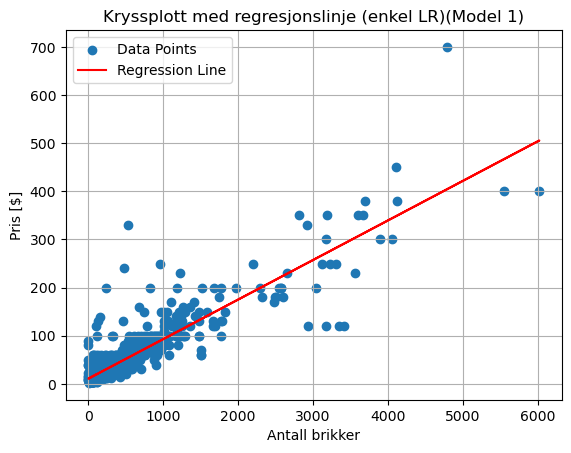

In [8]:
#plot of the regresionline
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)(Model 1)')
plt.legend()
plt.grid()
plt.show()

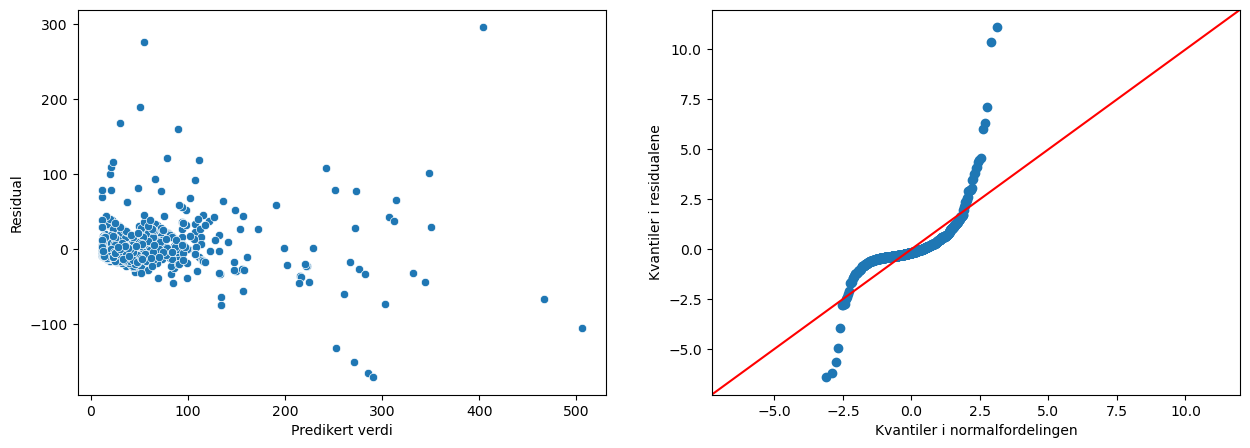

In [9]:
#residual-plott
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

#qq plot
sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [10]:
#Maps color of the categories
color_mapping = {
    "barn": "yellow",
    "uklart": "green",
    "eldre_barn": "red",
    "tenåring": "blue"
}

In [11]:
#Categorizes the age groups
def categorize_age(age_str):
    barn = ["1.5", "1.5-3", "1.5-5", "2", "2-5", "2-6", "3", "3-6", "4", "5"]
    eldre_barn = ["5-12", "6-10", "6-12", "6-14", "7-12", "5-10",
    "8-12", "9-12", "10", "11", "12", "8-14", "6", "7", "8", "9", "7-14"]
    tenåring = ["11-16", "14", "18", "16"]
    uklart = [ "4-99", "5-99", "6-99", "7-99", "8-16", "9-16", "10-16", "4-7", "9-14"]
    if age_str in barn:
        return 'barn'
    elif age_str in eldre_barn:
        return 'eldre_barn'
    elif age_str in tenåring:
        return 'tenåring'
    elif age_str in uklart:
        return 'uklart'
    else:
        print(age_str)

/tmp/ipykernel_298/883296488.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barn['Price'] = barn['Price'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipykernel_298/883296488.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenåring['Price'] = tenåring['Price'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipykernel_298/883296488.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

<Figure size 800x600 with 0 Axes>

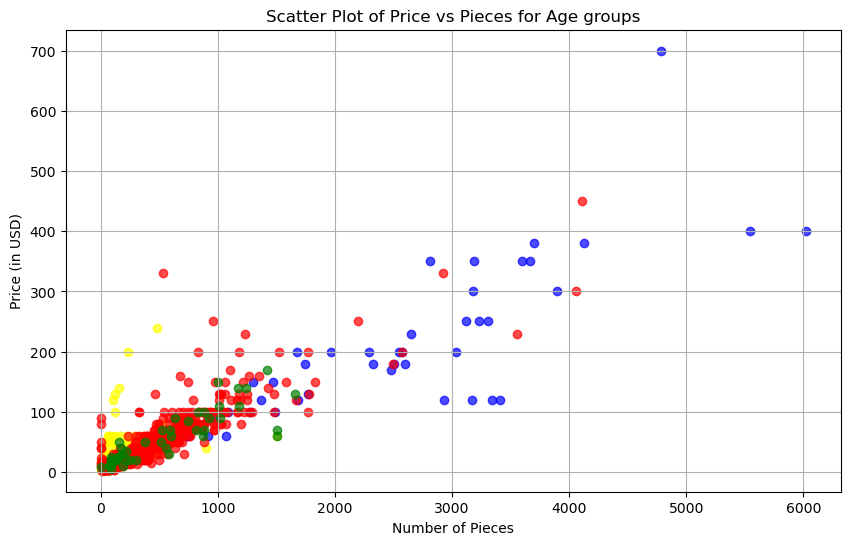

In [12]:
# Apply the function to categorize each item based on the 'Ages' column
df2['Category'] = df2['Ages'].apply(categorize_age)

# Separate data into lists based on the category
barn = df2[df2['Category'] == 'barn'].to_dict(orient="records")
eldre_barn = df2[df2['Category'] == 'eldre_barn'].to_dict(orient="records")
tenåring = df2[df2['Category'] == 'tenåring'].to_dict(orient="records")
uklart = df2[df2['Category'] == 'uklart'].to_dict(orient="records")

# Apply the function to categorize each age
Category = df2['Ages'].apply(categorize_age)


# Apply the function to add a 'Category' column
df2['Category'] = df2['Ages'].apply(categorize_age)


barn = df2[df2['Category'] == 'barn']
eldre_barn = df2[df2['Category'] == 'eldre_barn']
tenåring = df2[df2['Category'] == 'tenåring']
uklart = df2[df2['Category'] == 'uklart']

# Convert 'Price' column from strings to numeric values
barn['Price'] = barn['Price'].replace('[\$,]', '', regex=True).astype(float)
tenåring['Price'] = tenåring['Price'].replace('[\$,]', '', regex=True).astype(float)
eldre_barn['Price'] = eldre_barn['Price'].replace('[\$,]', '', regex=True).astype(float)
uklart['Price'] = uklart['Price'].replace('[\$,]', '', regex=True).astype(float)



plt.figure(figsize=(8, 6))


# Plotting the scatter plot
plt.figure(figsize=(10, 6))
#for color in np.unique(colors):
#    plt.scatter(x[colors == color], y[colors == color], label=color, color=color)
#plt.legend(title="Colors")
#for i, (color, explanation) in enumerate(explanations.items()):
#    plt.text(1.05, 0.8 - i * 0.1, explanation, color=color, ha='left', va='center', transform=plt.gca().transAxes,
#             bbox=dict(facecolor=color, edgecolor='none', boxstyle='round,pad=0.3'))

plt.scatter(barn['Pieces'], barn['Price'], color='yellow', alpha=0.7)
plt.scatter(tenåring['Pieces'], tenåring['Price'], color='blue', alpha=0.7)
plt.scatter(eldre_barn['Pieces'], eldre_barn['Price'], color='red', alpha=0.7)
plt.scatter(uklart['Pieces'], uklart['Price'], color='green', alpha=0.7)
plt.title("Scatter Plot of Price vs Pieces for Age groups")
plt.xlabel("Number of Pieces")
plt.ylabel("Price (in USD)")
plt.grid(True)
plt.show()





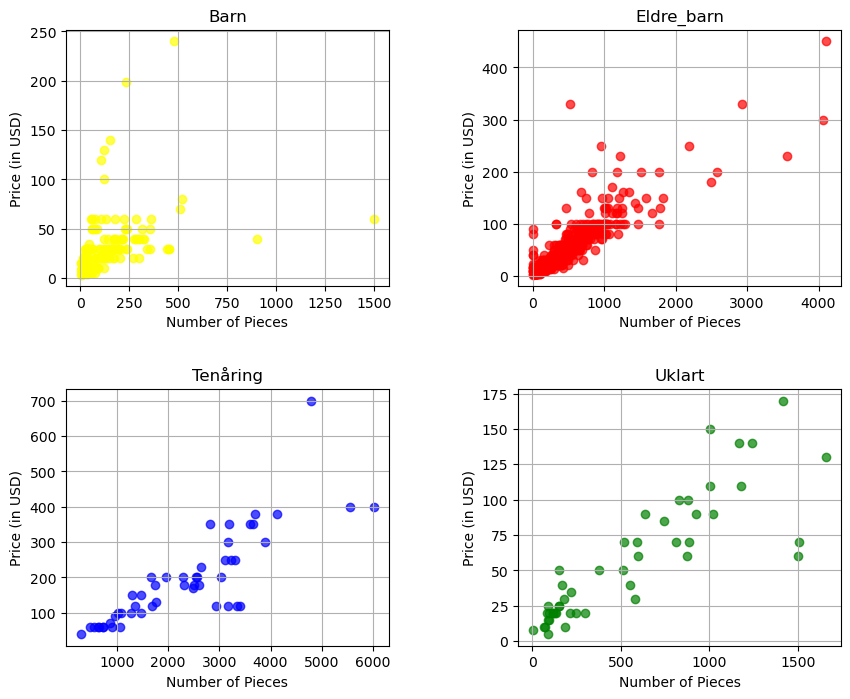

In [13]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.scatter(barn['Pieces'], barn['Price'], color='yellow', alpha=0.7)
plt.xlabel("Number of Pieces")
plt.ylabel("Price (in USD)")
plt.title("Barn")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.scatter(eldre_barn['Pieces'], eldre_barn['Price'], color='red', alpha=0.7)
plt.xlabel("Number of Pieces")
plt.ylabel("Price (in USD)")
plt.title("Eldre_barn")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.scatter(tenåring['Pieces'], tenåring['Price'], color='blue', alpha=0.7)
plt.xlabel("Number of Pieces")
plt.ylabel("Price (in USD)")
plt.title("Tenåring")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.scatter(uklart['Pieces'], uklart['Price'], color='green', alpha=0.7)
plt.xlabel("Number of Pieces")
plt.ylabel("Price (in USD)")
plt.title("Uklart")
plt.grid(True)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()



In [14]:
myages = ['barn', 'eldre_barn', 'tenåring', 'uklart']


subset_df = df2[df2['Category'].isin(myages)]

In [15]:
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()

In [16]:
# enkel LR for hvert tema hver for seg
resultater = []
for i, Category in enumerate(myages):
        modell3 = smf.ols('Price ~ Pieces', subset_df[subset_df['Category'] == Category])
        resultater.append(modell3.fit())


for i, model in enumerate(resultater):
    print(f"\nSummary for Category {myages[i]}:\n", model.summary())




Summary for Category barn:
                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     34.34
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           2.03e-08
Time:                        14:55:15   Log-Likelihood:                -896.90
No. Observations:                 191   AIC:                             1798.
Df Residuals:                     189   BIC:                             1804.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.8910  

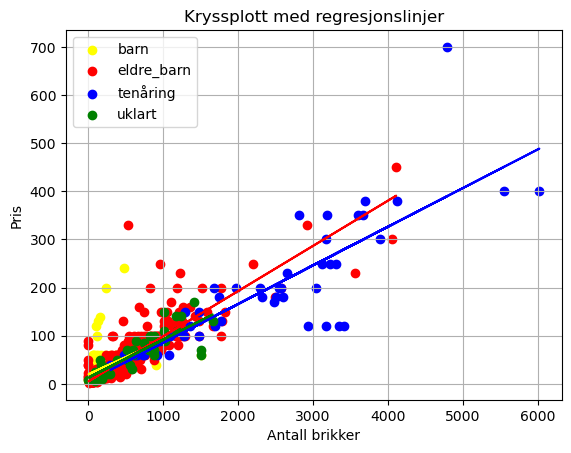

In [17]:
for i, ages in enumerate(myages):
    # Get the slope and intercept for the current age group
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']
    
    # Prepare regression line data
    regression_x = np.array(subset_df[subset_df['Category'] == ages]['Pieces'])
    regression_y = slope * regression_x + intercept

    # Get the specific color from the color mapping, default to a color if not specified
    color = color_mapping.get(ages, plt.cm.tab10(i))  # Fall back to colormap if age not in color_mapping
    
    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Category'] == ages]['Pieces'],
                subset_df[subset_df['Category'] == ages]['Price'],
                color=color, label=ages)
    plt.plot(regression_x, regression_y, color=color)
    
# Add plot labels and title
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

barn
eldre_barn
tenåring
uklart


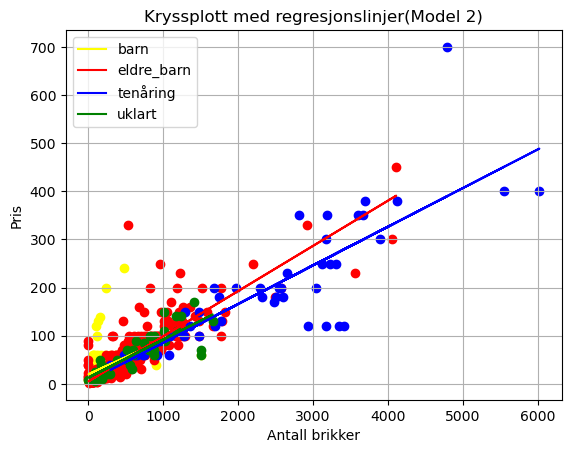

In [18]:

for i, ages in enumerate(myages):
    print(ages)
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df['Category'].isin([ages])]['Pieces'])
    regression_y = slope * regression_x + intercept


    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Category'].isin([ages])]['Pieces'], subset_df[subset_df['Category'].isin([ages])]['Price'], color=color_mapping.get(ages, plt.cm.tab10(i)))
    plt.plot(regression_x, regression_y, color=color_mapping.get(ages, plt.cm.tab10(i)), label=ages)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer(Model 2)')
plt.legend()
plt.grid()
plt.show()

In [19]:
# multippel lineær regresjon
modell2_mlr = smf.ols('Price ~ Category + Category * Pieces' , data = subset_df)
modell2_mlr.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     625.3
Date:                Sat, 16 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:55:16   Log-Likelihood:                -4979.8
No. Observations:                1065   AIC:                             9976.
Df Residuals:                    1057   BIC:                         1.002e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        19.8910      2.404      8.273      0.000      15.173      24.609
Category[T.eldre_barn]          -14.7594      2.717     -5.432      0.000     -20.091      -9.427
Category[T.tenåring]            -14.4215      7.799     -1.849      0.065     -29.725       0.882
Category[T.uklart]               -6.8582      6.262     -1.095      0.274     -19.146       5.429
Pieces                            0.0715      0.012      5.987      0.000       0.048       0.095
Category[T.eldre_barn]:Pieces     0.0224      0.012      1.844      0.066      -0.001       0.046
Category[T.tenåring]:Pieces       0.0088      0.012      0.717      0.474      -0.015       0.033
Category[T.uklart]:Pieces         0.0075      0.014      0.521      0.602      -0.021       0.036
==============================================================================
Omnibus:                      912.778   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75498.832
Skew:                           3.433   Prob(JB):                         0.00
Kurtosis:                      43.672   Cond. No.                     9.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# multippel lineær regresjon med en annen referansekategori
modell2_mlr_alt = smf.ols('Price ~ C(Category, Treatment("tenåring")) + C(Category, Treatment("tenåring"))*Pieces' , data = subset_df)
modell2_mlr_alt.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     625.3
Date:                Sat, 16 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:55:16   Log-Likelihood:                -4979.8
No. Observations:                1065   AIC:                             9976.
Df Residuals:                    1057   BIC:                         1.002e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                   5.4694      7.419      0.737      0.461      -9.089      20.028
C(Category, Treatment("tenåring"))[T.barn]                 14.4215      7.799      1.849      0.065      -0.882      29.725
C(Category, Treatment("tenåring"))[T.eldre_barn]           -0.3378      7.527     -0.045      0.964     -15.107      14.431
C(Category, Treatment("tenåring"))[T.uklart]                7.5633      9.406      0.804      0.422     -10.894      26.021
Pieces                                                      0.0803      0.003     28.844      0.000       0.075       0.086
C(Category, Treatment("tenåring"))[T.barn]:Pieces          -0.0088      0.012     -0.717      0.474      -0.033       0.015
C(Category, Treatment("tenåring"))[T.eldre_barn]:Pieces     0.0136      0.004      3.804      0.000       0.007       0.021
C(Category, Treatment("tenåring"))[T.uklart]:Pieces        -0.0013      0.009     -0.149      0.882      -0.018       0.015
==============================================================================
Omnibus:                      912.778   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75498.832
Skew:                           3.433   Prob(JB):                         0.00
Kurtosis:                      43.672   Cond. No.                     1.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Price ~ Pieces + Category' , data = subset_df)
modell3_mlr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1075.
Date:                Sat, 16 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:55:16   Log-Likelihood:                -4988.6
No. Observations:                1065   AIC:                             9987.
Df Residuals:                    1060   BIC:                         1.001e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17.8609      1.911      9.346      0.000      14.111      21.611
Category[T.eldre_barn]   -10.4002      2.164     -4.806      0.000     -14.646      -6.154
Category[T.tenåring]     -29.6811      5.595     -5.305      0.000     -40.659     -18.703
Category[T.uklart]        -9.5824      4.298     -2.230      0.026     -18.015      -1.150
Pieces                     0.0877      0.002     51.480      0.000       0.084       0.091
==============================================================================
Omnibus:                      832.650   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59638.204
Skew:                           2.991   Prob(JB):                         0.00
Kurtosis:                      39.169   Cond. No.                     5.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# multippel lineær regresjon med en annen referansekategori
modell3_mlr_alt = smf.ols('Price ~ Pieces + C(Category, Treatment("tenåring"))' , data = subset_df)
modell3_mlr_alt.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1075.
Date:                Sat, 16 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:55:17   Log-Likelihood:                -4988.6
No. Observations:                1065   AIC:                             9987.
Df Residuals:                    1060   BIC:                         1.001e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                          -11.8202      5.416     -2.183      0.029     -22.447      -1.194
C(Category, Treatment("tenåring"))[T.barn]          29.6811      5.595      5.305      0.000      18.703      40.659
C(Category, Treatment("tenåring"))[T.eldre_barn]    19.2808      5.053      3.815      0.000       9.365      29.197
C(Category, Treatment("tenåring"))[T.uklart]        20.0987      6.102      3.294      0.001       8.126      32.072
Pieces                                               0.0877      0.002     51.480      0.000       0.084       0.091
==============================================================================
Omnibus:                      832.650   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59638.204
Skew:                           2.991   Prob(JB):                         0.00
Kurtosis:                      39.169   Cond. No.                     1.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

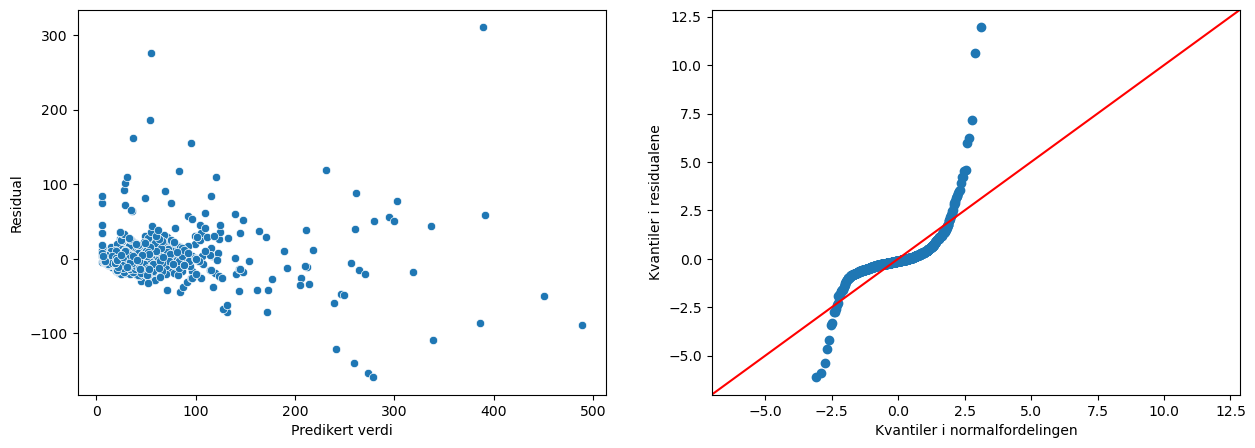

In [25]:
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell2_mlr.fit().fittedvalues, y = modell2_mlr.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell2_mlr.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()